# Spark SQL
Table 3-7 describes the commonly used DataFrame structured transformations. As a
reminder, a DataFrame is immutable, and its transformation operation always returns a
new DataFrame.

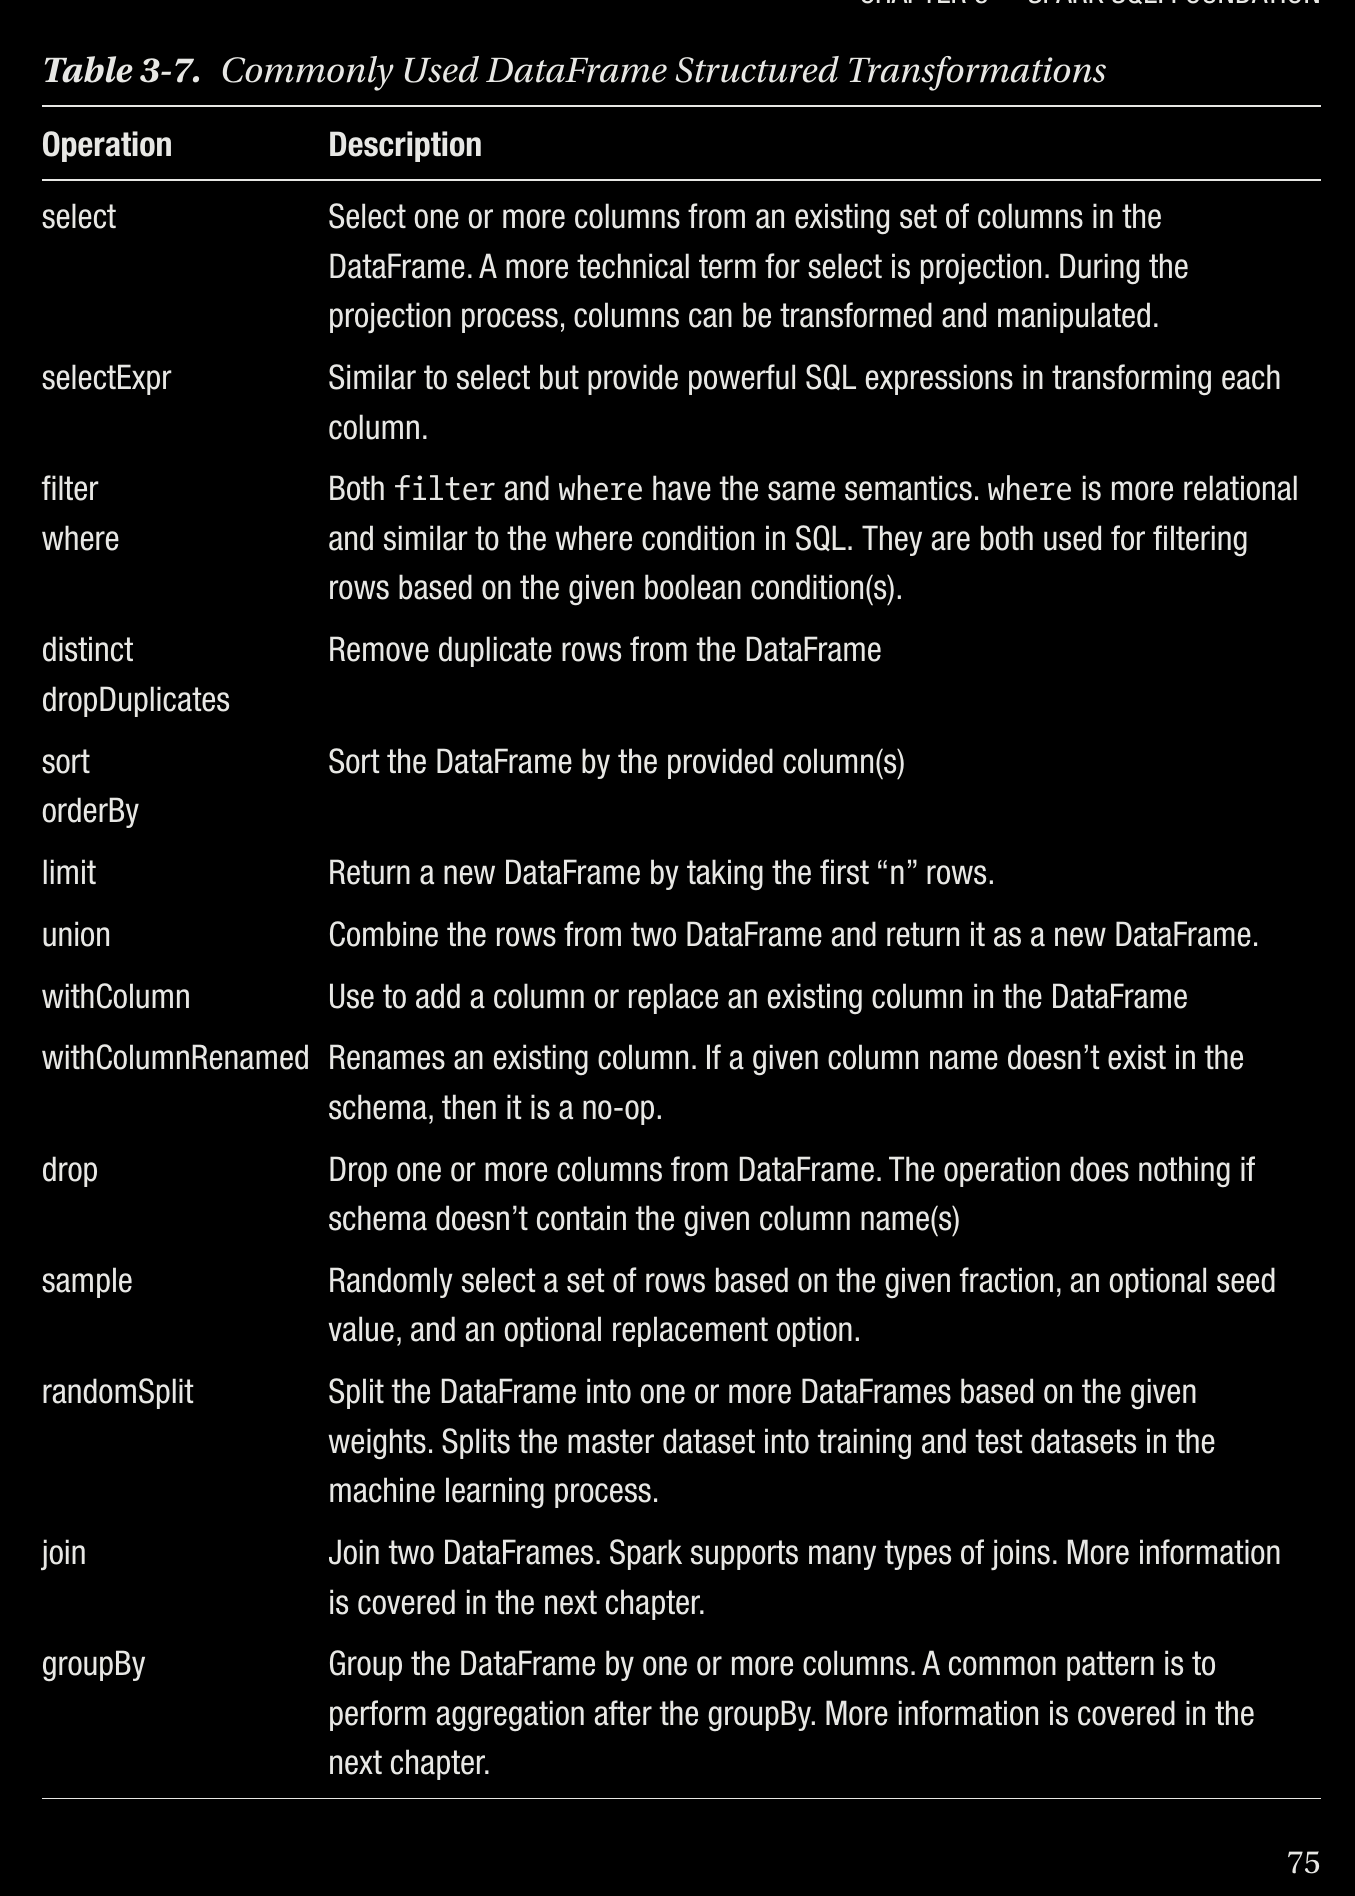

### Working with Columns

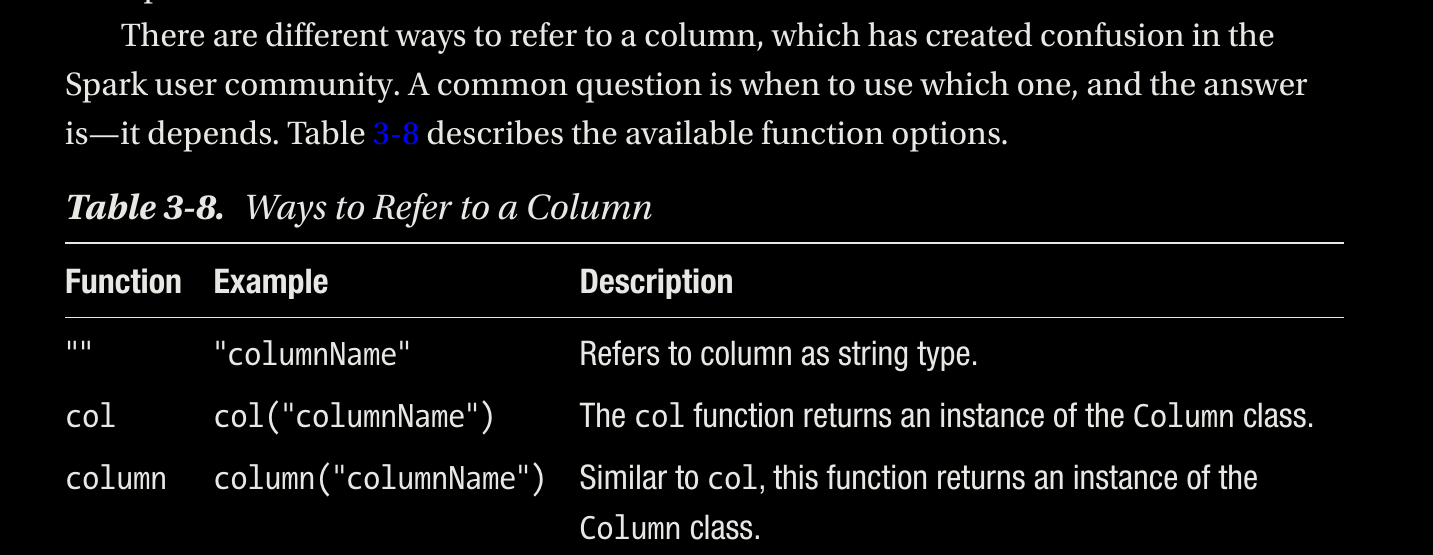

> Both col and column functions are synonymous,

In [1]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("demo").getOrCreate()

24/05/19 10:58:29 WARN Utils: Your hostname, msi-MAG resolves to a loopback address: 127.0.1.1; using 192.168.0.129 instead (on interface wlp3s0)
24/05/19 10:58:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 10:58:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.createDataFrame([(1,2),(2,3)], ["key","value"])
df.show()

+---+-----+
|key|value|
+---+-----+
|  1|    2|
|  2|    3|
+---+-----+



To display col names

In [4]:
df.columns

['key', 'value']

### Calling a colum 3 times
Not worth it 

In [8]:
# Method 1
df.select("key").show()

+---+
|key|
+---+
|  1|
|  2|
+---+



In [6]:
df.select(F.col("key")).show()


+---+
|key|
+---+
|  1|
|  2|
+---+



In [7]:
df.select(F.column("key")).show()

+---+
|key|
+---+
|  1|
|  2|
+---+



## Some Real SQL

In [10]:
# COMPARATOR
df.select('key', (F.col('key') > 1).alias('key > 1')).show()

+---+-------+
|key|key > 1|
+---+-------+
|  1|  false|
|  2|   true|
+---+-------+



get the file

In [4]:
import os

In [5]:
path = "/home/msi/beginning-apache-spark-3/chapter3/data/movies"
path = os.path.join(path,"movies.parquet")
path

'/home/msi/beginning-apache-spark-3/chapter3/data/movies/movies.parquet'

In [6]:
movies =  spark.read.format("parquet").load(path)

In [7]:
movies.show(10)

+-----------------+--------------------+-------------+
|       actor_name|         movie_title|produced_year|
+-----------------+--------------------+-------------+
|McClure, Marc (I)|        Coach Carter|         2005|
|McClure, Marc (I)|         Superman II|         1980|
|McClure, Marc (I)|           Apollo 13|         1995|
|McClure, Marc (I)|            Superman|         1978|
|McClure, Marc (I)|  Back to the Future|         1985|
|McClure, Marc (I)|Back to the Futur...|         1990|
|Cooper, Chris (I)|  Me, Myself & Irene|         2000|
|Cooper, Chris (I)|         October Sky|         1999|
|Cooper, Chris (I)|              Capote|         2005|
|Cooper, Chris (I)|The Bourne Supremacy|         2004|
+-----------------+--------------------+-------------+
only showing top 10 rows



## SQL

In [22]:
movies.select("movie_title","produced_year").show(5)

+------------------+-------------+
|       movie_title|produced_year|
+------------------+-------------+
|      Coach Carter|         2005|
|       Superman II|         1980|
|         Apollo 13|         1995|
|          Superman|         1978|
|Back to the Future|         1985|
+------------------+-------------+
only showing top 5 rows



In [23]:
movies.select("movie_title" , (F.col('produced_year') - F.col("produced_year") % 10).alias("produced_decade")).show(5)

+------------------+---------------+
|       movie_title|produced_decade|
+------------------+---------------+
|      Coach Carter|           2000|
|       Superman II|           1980|
|         Apollo 13|           1990|
|          Superman|           1970|
|Back to the Future|           1980|
+------------------+---------------+
only showing top 5 rows



> **a even Better approach** <br>
 pyspark.sql.functions.substring(str, pos, len) <br>
<br>
Substring starts at **pos** and is of length **len** when str is String type or returns the slice of byte array that starts at pos in byte and is of length len when str is Binary type.


In [27]:
movies.select("movie_title" ,F.substring((F.col('produced_year') - F.col("produced_year") % 10), -2, 2).alias("produced_decade")).show(5)

+------------------+---------------+
|       movie_title|produced_decade|
+------------------+---------------+
|      Coach Carter|             00|
|       Superman II|             80|
|         Apollo 13|             90|
|          Superman|             70|
|Back to the Future|             80|
+------------------+---------------+
only showing top 5 rows



how does it work, substract the remeinder

In [24]:
movies.select("movie_title" , F.col("produced_year") % 10).show(5)

+------------------+--------------------+
|       movie_title|(produced_year % 10)|
+------------------+--------------------+
|      Coach Carter|                   5|
|       Superman II|                   0|
|         Apollo 13|                   5|
|          Superman|                   8|
|Back to the Future|                   5|
+------------------+--------------------+
only showing top 5 rows



### selectExpr(expressions)
This transformation is a variant of the select transformation. The one big difference is
that it accepts one or more SQL expressions rather than columns.

> In PySpark, there isn't a direct equivalent of the SelectExpr method available in Spark SQL. However, you can achieve similar functionality using PySpark's select method along with expressions created using F.expr

In [33]:
movies.select("*", \
              F.expr("substring((produced_year - produced_year % 10), 3, 2)")\
              .alias("produced_decade"))\
              .show(5)

+-----------------+------------------+-------------+---------------+
|       actor_name|       movie_title|produced_year|produced_decade|
+-----------------+------------------+-------------+---------------+
|McClure, Marc (I)|      Coach Carter|         2005|             00|
|McClure, Marc (I)|       Superman II|         1980|             80|
|McClure, Marc (I)|         Apollo 13|         1995|             90|
|McClure, Marc (I)|          Superman|         1978|             70|
|McClure, Marc (I)|Back to the Future|         1985|             80|
+-----------------+------------------+-------------+---------------+
only showing top 5 rows



> <mark> I don't like this one </mark> things work differntly inside the expr

## filler(condition), where(condition)
It filters out the rows that don’t meet the given
condition <br>
> both the filter and where transformations have the same behavior, so pick
the one that you are most comfortable with

Filter

In [36]:
movies.filter(F.col("produced_year") < 2000).show(5)

+-----------------+--------------------+-------------+
|       actor_name|         movie_title|produced_year|
+-----------------+--------------------+-------------+
|McClure, Marc (I)|         Superman II|         1980|
|McClure, Marc (I)|           Apollo 13|         1995|
|McClure, Marc (I)|            Superman|         1978|
|McClure, Marc (I)|  Back to the Future|         1985|
|McClure, Marc (I)|Back to the Futur...|         1990|
+-----------------+--------------------+-------------+
only showing top 5 rows



Where

In [38]:
movies.where(F.col("produced_year") > 2000).show(5)

+-----------------+--------------------+-------------+
|       actor_name|         movie_title|produced_year|
+-----------------+--------------------+-------------+
|McClure, Marc (I)|        Coach Carter|         2005|
|Cooper, Chris (I)|              Capote|         2005|
|Cooper, Chris (I)|The Bourne Supremacy|         2004|
|Cooper, Chris (I)|            The Town|         2010|
|Cooper, Chris (I)|          Seabiscuit|         2003|
+-----------------+--------------------+-------------+
only showing top 5 rows



In [42]:
#equality comparison require 2 equal signs
movies.where(F.col("produced_year") == 2000).show(5,truncate=False)

+-----------------+---------------------+-------------+
|actor_name       |movie_title          |produced_year|
+-----------------+---------------------+-------------+
|Cooper, Chris (I)|Me, Myself & Irene   |2000         |
|Cooper, Chris (I)|The Patriot          |2000         |
|Jolie, Angelina  |Gone in Sixty Seconds|2000         |
|Yip, Françoise   |Romeo Must Die       |2000         |
|Danner, Blythe   |Meet the Parents     |2000         |
+-----------------+---------------------+-------------+
only showing top 5 rows



In [44]:
# 
movies.select("movie_title","produced_year").filter(F.col("produced_year") != 2000).show(5)

+------------------+-------------+
|       movie_title|produced_year|
+------------------+-------------+
|      Coach Carter|         2005|
|       Superman II|         1980|
|         Apollo 13|         1995|
|          Superman|         1978|
|Back to the Future|         1985|
+------------------+-------------+
only showing top 5 rows



AND

In [49]:
movies.where((F.col("produced_year") >= 2000) & (F.length(F.col("movie_title")) < 5)).show(5)

+---------------+-----------+-------------+
|     actor_name|movie_title|produced_year|
+---------------+-----------+-------------+
|Jolie, Angelina|       Salt|         2010|
| Cueto, Esteban|        xXx|         2002|
|  Butters, Mike|        Saw|         2004|
| Franko, Victor|         21|         2008|
|  Ogbonna, Chuk|       Salt|         2010|
+---------------+-----------+-------------+
only showing top 5 rows



Or you can use Concatenated expressions

In [51]:
movies.where(F.col("produced_year") >= 2000).where(F.length(F.col("movie_title")) <
5).show(5)

+---------------+-----------+-------------+
|     actor_name|movie_title|produced_year|
+---------------+-----------+-------------+
|Jolie, Angelina|       Salt|         2010|
| Cueto, Esteban|        xXx|         2002|
|  Butters, Mike|        Saw|         2004|
| Franko, Victor|         21|         2008|
|  Ogbonna, Chuk|       Salt|         2010|
+---------------+-----------+-------------+
only showing top 5 rows



## distinct, dropDuplicates


In [55]:
movies.select("movie_title").distinct()\
    .select(F.count("movie_title").alias("movie_count")).show()

+-----------+
|movie_count|
+-----------+
|       1409|
+-----------+



drop needs []

In [60]:
movies.dropDuplicates(["movie_title"])\
    .select(F.count("movie_title").alias("movie_count")).show()

+-----------+
|movie_count|
+-----------+
|       1409|
+-----------+



## sort(columns), orderBy(columns)
Both transformations have the same semantics. 

In [8]:
movieTitles = movies.dropDuplicates(["movie_title"]).select("movie_title","produced_year",
F.length("movie_title").alias("title_length"))

In [9]:
movieTitles.sort(F.col("title_length").desc()).show(5,False)

+-----------------------------------------------------------------------------------+-------------+------------+
|movie_title                                                                        |produced_year|title_length|
+-----------------------------------------------------------------------------------+-------------+------------+
|Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan|2006         |83          |
|The Chronicles of Narnia: The Lion, the Witch and the Wardrobe                     |2005         |62          |
|Hannah Montana & Miley Cyrus: Best of Both Worlds Concert                          |2008         |57          |
|The Chronicles of Narnia: The Voyage of the Dawn Treader                           |2010         |56          |
|Istoriya pro Richarda, milorda i prekrasnuyu Zhar-ptitsu                           |1997         |56          |
+-----------------------------------------------------------------------------------+-----------